<h1> Adjusting the learning rate </h1>

Goal of this notebook is to find an optimal learning rate. The jumpy validation loss suggest a lower learning rate than $\alpha = 0.005$. Performing on $\alpha = 0.001$ didn't improve much. So let's try even lower learning rates

In [1]:
import myfunctions as mf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
from scipy.optimize import curve_fit
import time
import random

In [2]:
# load data
rootfile = uproot.open("./stage1_clusters_bigdata.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clusters5x5, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)
clusters = clusters5x5.reshape((clusters5x5.shape[0], 25))

This took  292.71823024749756 s


In [4]:
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)

In [5]:
# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

<h2> Learning rate $\alpha = 0.0001$ </h2>

$\alpha = 0.01$ is the default value, so I reduce it by two order of magnitudes. Therefore I'll run 200epochs.

In [6]:
model1 = keras.Sequential([layers.Input(shape=(25)),
                         layers.LayerNormalization(axis=1),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model1.summary()
model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.0001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 25)                50        
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [7]:
a = time.time()
fit_hist = model1.fit(clusters_t, training, batch_size=50, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
10353/10353 [==============================] - 27s 3ms/step - loss: 74.7523 - val_loss: 0.0666
Epoch 2/200
10353/10353 [==============================] - 26s 3ms/step - loss: 0.0446 - val_loss: 0.0367
Epoch 3/200
10353/10353 [==============================] - 26s 2ms/step - loss: 0.0250 - val_loss: 0.0185
Epoch 4/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0199 - val_loss: 0.0184
Epoch 5/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0173 - val_loss: 0.0138
Epoch 6/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0156 - val_loss: 0.0103
Epoch 7/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0144 - val_loss: 0.0112
Epoch 8/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0137 - val_loss: 0.0198
Epoch 9/200
10353/10353 [==============================] - 21s 2ms/step - loss: 0.0129 - val_loss: 0.0107
Epoch 10/200
10353/10353 [===================

10353/10353 [==============================] - 22s 2ms/step - loss: 0.0066 - val_loss: 0.0047
Epoch 78/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0067 - val_loss: 0.0050
Epoch 79/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 80/200
10353/10353 [==============================] - 22s 2ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 81/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0065 - val_loss: 0.0075
Epoch 82/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0064 - val_loss: 0.0262
Epoch 83/200
10353/10353 [==============================] - 22s 2ms/step - loss: 0.0066 - val_loss: 0.0074
Epoch 84/200
10353/10353 [==============================] - 23s 2ms/step - loss: 0.0065 - val_loss: 0.0048
Epoch 85/200
10353/10353 [==============================] - 22s 2ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 86/200
10353/10353 [========================

10353/10353 [==============================] - 21s 2ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 154/200
10353/10353 [==============================] - 21s 2ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 155/200
10353/10353 [==============================] - 21s 2ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 156/200
10353/10353 [==============================] - 21s 2ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 157/200
10353/10353 [==============================] - 21s 2ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 158/200
10353/10353 [==============================] - 24s 2ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 159/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0052 - val_loss: 0.0236
Epoch 160/200
10353/10353 [==============================] - 24s 2ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 161/200
10353/10353 [==============================] - 25s 2ms/step - loss: 0.0051 - val_loss: 0.0092
Epoch 162/200
10353/10353 [===============

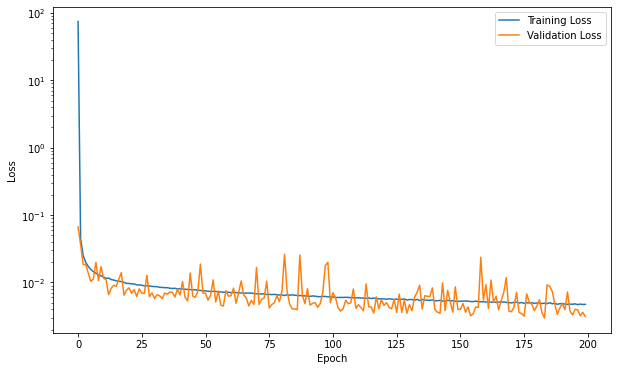

In [8]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [9]:
output = model1.predict(clusters_v)

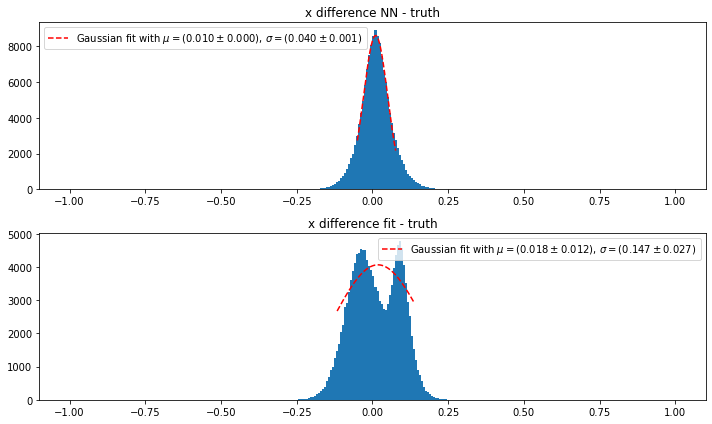

(array([1.04108888e-02, 3.98533673e-02, 8.60229543e+02]),
 array([4.57066996e-04, 5.90648997e-04, 1.03041089e+01]),
 array([1.81492238e-02, 1.47273906e-01, 1.50082019e+03]),
 array([1.16207866e-02, 2.74487209e-02, 2.33705322e+02]))

In [10]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x")

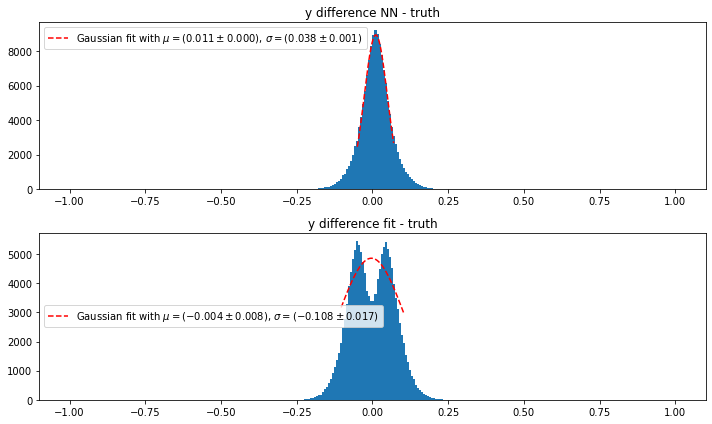

(array([1.09958426e-02, 3.79795205e-02, 8.50352940e+02]),
 array([4.57130083e-04, 5.90724310e-04, 1.06888873e+01]),
 array([-3.59335380e-03, -1.07901939e-01,  1.31559350e+03]),
 array([7.84167892e-03, 1.66460001e-02, 1.64990425e+02]))

In [11]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

In [12]:
keras.models.save_model(model1, 'stage1model_lr0.0001')

INFO:tensorflow:Assets written to: stage1model_lr0.0001/assets


<h2> Learning rate $\alpha = 0.01$ </h2>

Just to be sure that I'm not missing the global maximum I'll try to run it once with the default value of $\alpha = 0.01$.

In [13]:
model2 = keras.Sequential([layers.Input(shape=(25)),
                         layers.LayerNormalization(axis=1),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model2.summary()
model2.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.01))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_1 (Layer (None, 25)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [14]:
a = time.time()
fit_hist = model2.fit(clusters_t, training, batch_size=50, epochs=50, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/50
10353/10353 [==============================] - 23s 2ms/step - loss: 6.2749 - val_loss: 0.1241
Epoch 2/50
10353/10353 [==============================] - 23s 2ms/step - loss: 0.2587 - val_loss: 0.0347
Epoch 3/50
10353/10353 [==============================] - 22s 2ms/step - loss: 0.1785 - val_loss: 0.0622
Epoch 4/50
10353/10353 [==============================] - 22s 2ms/step - loss: 0.1445 - val_loss: 0.0202
Epoch 5/50
10353/10353 [==============================] - 22s 2ms/step - loss: 4.9989 - val_loss: 1.9498
Epoch 6/50
10353/10353 [==============================] - 22s 2ms/step - loss: 1.6690 - val_loss: 0.9387
Epoch 7/50
10353/10353 [==============================] - 22s 2ms/step - loss: 0.7345 - val_loss: 0.6277
Epoch 8/50
10353/10353 [==============================] - 22s 2ms/step - loss: 0.6548 - val_loss: 0.7315
Epoch 9/50
10353/10353 [==============================] - 22s 2ms/step - loss: 0.6671 - val_loss: 0.6317
Epoch 10/50
10353/10353 [==============================

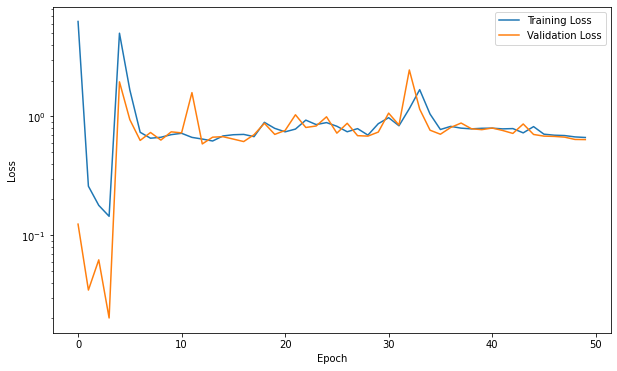

In [15]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

One can see that there is divergence. The learning rate is definitly too high. Assumption approved.

In [16]:
output = model2.predict(clusters_v)

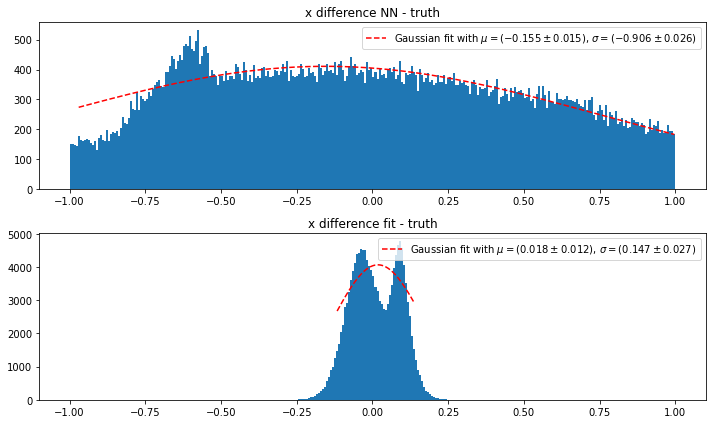

(array([-1.54554185e-01, -9.05526194e-01,  9.32314993e+02]),
 array([1.53182795e-02, 2.57529543e-02, 2.18038258e+01]),
 array([1.81492238e-02, 1.47273906e-01, 1.50082019e+03]),
 array([1.16207866e-02, 2.74487209e-02, 2.33705322e+02]))

In [17]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x")

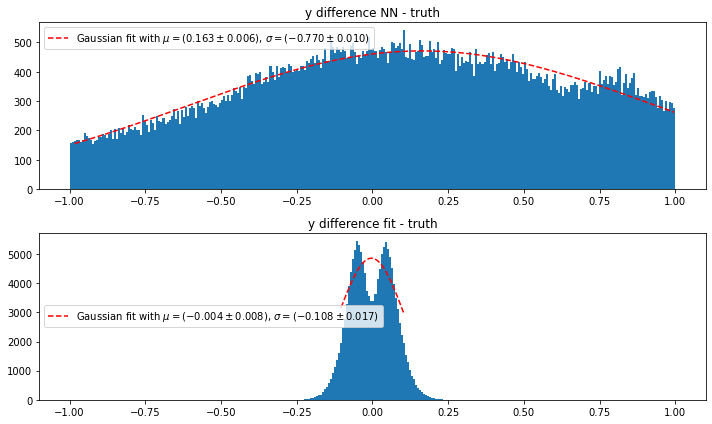

(array([ 1.63317723e-01, -7.70217524e-01,  9.09319376e+02]),
 array([6.44907912e-03, 9.78345405e-03, 9.28348920e+00]),
 array([-3.59335380e-03, -1.07901939e-01,  1.31559350e+03]),
 array([7.84167892e-03, 1.66460001e-02, 1.64990425e+02]))

In [18]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

In [19]:
keras.models.save_model(model2, 'stage1model_lr0.01')

INFO:tensorflow:Assets written to: stage1model_lr0.01/assets


<h2> summary </h2>

| (x/y) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simplest model $\alpha=0.005$ |0.035 / 0.040 | 0.054 / 0.044 |
| simplest model & standardization $\alpha=0.005$ | 0.047 / 0.048  | 0.044 / 0.045 |
| simplest model & standardization & $\alpha=0.001$, 50 epochs| 0.076 / 0.013  | 0.045 / 0.046 |
| simplest model & standardization & $\alpha=0.001$, 200 epochs| 0.014 / 0.034  | 0.042 / 0.043 |
| simplest model & standardization & $\alpha=0.0001$, 200 epochs| 0.010 / 0.011  | 0.040 / 0.038 |
| simplest model & standardization & $\alpha=0.01$, 50 epochs| divergence  | divergence |

